In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pycaret.classification import *

In [2]:
# Load the entire dataset into a pandas dataframe

df = pd.read_parquet('/nobackup/amimalik/bits/dataset/dimensions/4Q/working_dataset.parquet')
model_df = pd.read_csv('/nobackup/amimalik/bits/dataset/dimensions/4Q/sorted_failures.csv')

model_df = model_df.head(5)

In [3]:
def get_model_data(df, model):
    model_df = df[df['model'] == model]
    model_df = model_df.drop(columns=['model'])
    model_df.drop(columns=['serial_number'], inplace=True)
    return model_df

In [4]:
def get_clean_data(df):
    test = df.isnull().sum()
    d_col = []
    for k in test.keys():
        if test[k] == df.shape[0]:
            d_col.append(k)
    df.drop(columns=d_col, inplace=True)    
    return df

In [5]:
# List of common tree-based models in PyCaret for classification
ml_models = ['dt', 'rf', 'et', 'lightgbm', 'xgboost', 'catboost']
# ml_models = ['dt', 'rf']

# start a loop
m_models = []
m_results = []

In [6]:
for dev_models in model_df['model']:
    model_data = get_model_data(df, dev_models)
    model_data = get_clean_data(model_data)

    s = setup(model_data, target = 'failure', session_id = 123, index=False, fix_imbalance = True, remove_outliers = True, normalize = True, normalize_method = 'minmax', verbose = False, fold=5)

    for m in ml_models:
        print (m)
        model = create_model(m)
        model_results = pull().loc[['Mean']]
        m_models.append(model)
        m_results.append(model_results)
    print(dev_models)

dt


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9743,0.5443,0.1071,0.0495,0.0677,0.0564,0.0608
1,0.9744,0.5688,0.1566,0.0684,0.0952,0.0843,0.0918
2,0.9724,0.5734,0.1325,0.0537,0.0764,0.0649,0.0719
3,0.9723,0.5434,0.1071,0.0448,0.0632,0.0515,0.0566
4,0.9776,0.5519,0.1190,0.0658,0.0847,0.0744,0.0777
Mean,0.9742,0.5564,0.1245,0.0564,0.0774,0.0663,0.0718
Std,0.0019,0.0125,0.0186,0.0092,0.0116,0.0119,0.0125


rf


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9767,0.7996,0.0833,0.0452,0.0586,0.0478,0.0501
1,0.9836,0.8403,0.0723,0.0690,0.0706,0.0623,0.0623
2,0.9820,0.8033,0.0482,0.0408,0.0442,0.0352,0.0353
3,0.9855,0.8092,0.0952,0.1111,0.1026,0.0953,0.0956
4,0.9804,0.8488,0.0476,0.0354,0.0406,0.0309,0.0313
Mean,0.9816,0.8202,0.0693,0.0603,0.0633,0.0543,0.0549
Std,0.0030,0.0203,0.0189,0.0279,0.0223,0.0232,0.0231


et


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.8014,0.0952,0.0457,0.0618,0.0506,0.0541
1,0.9808,0.8487,0.0723,0.0526,0.0609,0.0515,0.0521
2,0.9839,0.8047,0.0723,0.0714,0.0719,0.0637,0.0637
3,0.9826,0.8258,0.0595,0.0532,0.0562,0.0474,0.0475
4,0.9791,0.8203,0.0714,0.0465,0.0563,0.0463,0.0474
Mean,0.9802,0.8202,0.0742,0.0539,0.0614,0.0519,0.0530
Std,0.0032,0.0170,0.0116,0.0093,0.0057,0.0062,0.0060


lightgbm


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9514,0.7018,0.2024,0.0407,0.0677,0.0540,0.0732
1,0.9583,0.7397,0.1446,0.0350,0.0563,0.0431,0.0548
2,0.9571,0.7082,0.1807,0.0417,0.0677,0.0545,0.0705
3,0.9542,0.7262,0.2262,0.0481,0.0793,0.0659,0.0876
4,0.9567,0.7639,0.2738,0.0607,0.0994,0.0863,0.1131
Mean,0.9556,0.7279,0.2055,0.0452,0.0741,0.0608,0.0798
Std,0.0025,0.0224,0.0434,0.0088,0.0146,0.0147,0.0196


xgboost


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9644,0.6754,0.1667,0.0488,0.0755,0.0628,0.0755
1,0.9715,0.7295,0.1446,0.0556,0.0803,0.0687,0.0769
2,0.9667,0.6875,0.1687,0.0526,0.0802,0.0680,0.0803
3,0.9725,0.7147,0.1071,0.0452,0.0636,0.0520,0.0570
4,0.9652,0.7269,0.1786,0.0534,0.0822,0.0697,0.0833
Mean,0.9681,0.7068,0.1531,0.0511,0.0764,0.0642,0.0746
Std,0.0033,0.0217,0.0255,0.0037,0.0067,0.0066,0.0092


catboost


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9685,0.6645,0.1429,0.0492,0.0732,0.0610,0.0702
1,0.9772,0.7262,0.0964,0.0523,0.0678,0.0573,0.0600
2,0.9733,0.6650,0.1325,0.0561,0.0789,0.0676,0.0741
3,0.9749,0.7147,0.0833,0.0407,0.0547,0.0435,0.0464
4,0.9705,0.7241,0.1429,0.0536,0.0779,0.0661,0.0744
Mean,0.9729,0.6989,0.1196,0.0504,0.0705,0.0591,0.0650
Std,0.0031,0.0281,0.0249,0.0053,0.0088,0.0086,0.0107


ST12000NM0008
dt


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9680,0.5529,0.1304,0.0577,0.0800,0.0662,0.0720
1,0.9697,0.5838,0.1912,0.0844,0.1171,0.1040,0.1131
2,0.9708,0.5556,0.1324,0.0647,0.0870,0.0739,0.0788
3,0.9527,0.5521,0.1449,0.0389,0.0613,0.0453,0.0559
4,0.9721,0.5333,0.0870,0.0488,0.0625,0.0495,0.0516
Mean,0.9666,0.5555,0.1372,0.0589,0.0816,0.0678,0.0743
Std,0.0071,0.0162,0.0334,0.0154,0.0203,0.0210,0.0218


rf


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9831,0.7915,0.1304,0.1552,0.1417,0.1333,0.1338
1,0.9797,0.8257,0.0735,0.0685,0.0709,0.0607,0.0607
2,0.9793,0.8105,0.0735,0.0658,0.0694,0.0590,0.0591
3,0.9706,0.7654,0.1014,0.0519,0.0686,0.0553,0.0585
4,0.9836,0.7552,0.0725,0.1064,0.0862,0.0782,0.0797
Mean,0.9793,0.7897,0.0903,0.0895,0.0874,0.0773,0.0784
Std,0.0047,0.0265,0.0229,0.0375,0.0279,0.0291,0.0288


et


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9848,0.7982,0.1159,0.1778,0.1404,0.1330,0.1361
1,0.9793,0.8304,0.1029,0.0875,0.0946,0.0842,0.0845
2,0.9824,0.8274,0.0588,0.0741,0.0656,0.0568,0.0572
3,0.9766,0.7723,0.0870,0.0638,0.0736,0.0621,0.0628
4,0.9811,0.7906,0.1014,0.1045,0.1029,0.0934,0.0934
Mean,0.9808,0.8038,0.0932,0.1015,0.0954,0.0859,0.0868
Std,0.0028,0.0222,0.0195,0.0405,0.0262,0.0272,0.0281


lightgbm


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9615,0.6604,0.2174,0.0714,0.1075,0.0930,0.1083
1,0.9539,0.6780,0.1912,0.0508,0.0802,0.0647,0.0801
2,0.9494,0.6610,0.1912,0.0456,0.0737,0.0576,0.0739
3,0.9544,0.5895,0.1739,0.0480,0.0752,0.0595,0.0728
4,0.9638,0.6415,0.1739,0.0635,0.0930,0.0786,0.0892
Mean,0.9566,0.6461,0.1895,0.0559,0.0859,0.0707,0.0849
Std,0.0053,0.0306,0.0159,0.0099,0.0128,0.0133,0.0131


xgboost


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9746,0.6433,0.1739,0.1008,0.1277,0.1157,0.1202
1,0.9700,0.6913,0.1618,0.0743,0.1019,0.0887,0.0957
2,0.9732,0.6745,0.1471,0.0800,0.1036,0.0912,0.0956
3,0.9700,0.5734,0.1159,0.0567,0.0762,0.0628,0.0669
4,0.9720,0.6355,0.1594,0.0821,0.1084,0.0956,0.1011
Mean,0.9720,0.6436,0.1516,0.0788,0.1035,0.0908,0.0959
Std,0.0018,0.0406,0.0198,0.0142,0.0165,0.0169,0.0171


catboost


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9763,0.6460,0.1594,0.1038,0.1257,0.1143,0.1170
1,0.9734,0.6671,0.1029,0.0593,0.0753,0.0628,0.0652
2,0.9726,0.6345,0.1471,0.0775,0.1015,0.0890,0.0937
3,0.9697,0.5966,0.1159,0.0559,0.0755,0.0620,0.0663
4,0.9748,0.6073,0.1449,0.0877,0.1093,0.0973,0.1005
Mean,0.9734,0.6303,0.1341,0.0769,0.0975,0.0850,0.0885
Std,0.0022,0.0256,0.0211,0.0178,0.0197,0.0202,0.0201


ST8000NM0055
dt


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9785,0.5882,0.1905,0.1143,0.1429,0.1327,0.1371
1,0.9778,0.5478,0.1094,0.0707,0.0859,0.0752,0.0770
2,0.9719,0.5603,0.1406,0.0634,0.0874,0.0752,0.0814
3,0.9786,0.5569,0.1270,0.0833,0.1006,0.0903,0.0924
4,0.9758,0.5161,0.0476,0.0286,0.0357,0.0242,0.0251
Mean,0.9765,0.5538,0.1230,0.0721,0.0905,0.0795,0.0826
Std,0.0025,0.0232,0.0464,0.0279,0.0343,0.0347,0.0358


rf


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9831,0.8495,0.0952,0.0968,0.0960,0.0875,0.0875
1,0.9849,0.8172,0.0781,0.1064,0.0901,0.0827,0.0837
2,0.9860,0.8071,0.0312,0.0588,0.0408,0.0344,0.0362
3,0.9886,0.8192,0.1270,0.2759,0.1739,0.1690,0.1820
4,0.9852,0.8341,0.0317,0.0500,0.0388,0.0318,0.0326
Mean,0.9856,0.8254,0.0727,0.1176,0.0879,0.0811,0.0844
Std,0.0018,0.0148,0.0371,0.0820,0.0492,0.0498,0.0539


et


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9791,0.8568,0.0794,0.0575,0.0667,0.0564,0.0571
1,0.9734,0.8297,0.0781,0.0403,0.0532,0.0411,0.0434
2,0.9769,0.8560,0.0781,0.0495,0.0606,0.0495,0.0508
3,0.9836,0.8415,0.1429,0.1385,0.1406,0.1323,0.1324
4,0.9786,0.8305,0.0794,0.0556,0.0654,0.0549,0.0558
Mean,0.9783,0.8429,0.0916,0.0683,0.0773,0.0668,0.0679
Std,0.0033,0.0118,0.0257,0.0356,0.0320,0.0332,0.0326


lightgbm


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9728,0.6987,0.1746,0.0780,0.1078,0.0961,0.1042
1,0.9716,0.7393,0.0781,0.0368,0.0500,0.0375,0.0403
2,0.9724,0.7156,0.1719,0.0769,0.1063,0.0943,0.1023
3,0.9727,0.7300,0.1270,0.0588,0.0804,0.0684,0.0737
4,0.9742,0.7144,0.1429,0.0703,0.0942,0.0827,0.0881
Mean,0.9727,0.7196,0.1389,0.0642,0.0878,0.0758,0.0817
Std,0.0008,0.0140,0.0353,0.0153,0.0213,0.0216,0.0235


xgboost


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9776,0.7188,0.1270,0.0777,0.0964,0.0857,0.0884
1,0.9731,0.7169,0.0938,0.0469,0.0625,0.0504,0.0535
2,0.9746,0.7074,0.0938,0.0508,0.0659,0.0542,0.0568
3,0.9794,0.7232,0.1587,0.1053,0.1266,0.1166,0.1191
4,0.9713,0.6681,0.0794,0.0360,0.0495,0.0370,0.0401
Mean,0.9752,0.7069,0.1105,0.0633,0.0802,0.0688,0.0716
Std,0.0029,0.0201,0.0287,0.0251,0.0278,0.0287,0.0286


catboost


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9804,0.6533,0.1270,0.0952,0.1088,0.0992,0.1002
1,0.9712,0.7076,0.0625,0.0292,0.0398,0.0271,0.0292
2,0.9782,0.6752,0.1094,0.0729,0.0875,0.0769,0.0785
3,0.9833,0.7323,0.1587,0.1449,0.1515,0.1431,0.1432
4,0.9751,0.6437,0.0794,0.0439,0.0565,0.0449,0.0470
Mean,0.9776,0.6824,0.1074,0.0772,0.0888,0.0782,0.0796
Std,0.0042,0.0332,0.0341,0.0409,0.0394,0.0409,0.0402


ST4000DM000
dt


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9564,0.5078,0.0508,0.0132,0.0210,0.0065,0.0081
1,0.9620,0.5274,0.0847,0.0256,0.0394,0.0256,0.0305
2,0.9671,0.5478,0.1207,0.0419,0.0622,0.0495,0.0568
3,0.9696,0.5233,0.0690,0.0276,0.0394,0.0269,0.0298
4,0.9614,0.5271,0.0847,0.0251,0.0388,0.0249,0.0299
Mean,0.9633,0.5267,0.0820,0.0267,0.0401,0.0267,0.0310
Std,0.0046,0.0127,0.0230,0.0091,0.0131,0.0136,0.0154


rf


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9729,0.6347,0.0169,0.0085,0.0114,-0.0009,-0.0009
1,0.9751,0.6360,0.0678,0.0367,0.0476,0.0361,0.0379
2,0.9742,0.6423,0.0690,0.0345,0.0460,0.0343,0.0365
3,0.9780,0.6483,0.0517,0.0337,0.0408,0.0302,0.0309
4,0.9740,0.7128,0.0508,0.0263,0.0347,0.0229,0.0241
Mean,0.9748,0.6548,0.0513,0.0280,0.0361,0.0245,0.0257
Std,0.0017,0.0294,0.0188,0.0103,0.0132,0.0135,0.0142


et


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9742,0.7193,0.0339,0.0180,0.0235,0.0117,0.0123
1,0.9712,0.6565,0.0847,0.0368,0.0513,0.0390,0.0425
2,0.9707,0.7294,0.0690,0.0290,0.0408,0.0285,0.0313
3,0.9676,0.6517,0.0690,0.0253,0.0370,0.0241,0.0273
4,0.9626,0.7314,0.1017,0.0311,0.0476,0.0340,0.0404
Mean,0.9693,0.6976,0.0717,0.0280,0.0401,0.0275,0.0308
Std,0.0039,0.0358,0.0224,0.0062,0.0097,0.0093,0.0108


lightgbm


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9534,0.4998,0.0339,0.0082,0.0132,-0.0016,-0.0021
1,0.9478,0.4720,0.0508,0.0106,0.0176,0.0024,0.0033
2,0.9662,0.5402,0.0862,0.0296,0.0441,0.0310,0.0357
3,0.9594,0.5106,0.0345,0.0097,0.0151,0.0010,0.0012
4,0.9643,0.6496,0.0339,0.0115,0.0172,0.0035,0.0040
Mean,0.9582,0.5345,0.0479,0.0139,0.0214,0.0073,0.0084
Std,0.0068,0.0616,0.0202,0.0079,0.0114,0.0120,0.0138


xgboost


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9603,0.5297,0.0508,0.0149,0.0230,0.0089,0.0107
1,0.9587,0.4856,0.0169,0.0048,0.0075,-0.0069,-0.0084
2,0.9650,0.5591,0.1034,0.0335,0.0506,0.0375,0.0438
3,0.9614,0.5046,0.0172,0.0052,0.0080,-0.0060,-0.0071
4,0.9643,0.6474,0.0339,0.0115,0.0172,0.0035,0.0040
Mean,0.9619,0.5453,0.0445,0.0140,0.0213,0.0074,0.0086
Std,0.0024,0.0567,0.0320,0.0105,0.0158,0.0162,0.0190


catboost


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9675,0.5476,0.0339,0.0130,0.0188,0.0056,0.0062
1,0.9661,0.4907,0.0847,0.0296,0.0439,0.0307,0.0352
2,0.9704,0.5414,0.1207,0.0479,0.0686,0.0564,0.0627
3,0.9704,0.5335,0.0345,0.0147,0.0206,0.0081,0.0088
4,0.9712,0.6323,0.0339,0.0154,0.0212,0.0086,0.0093
Mean,0.9691,0.5491,0.0615,0.0241,0.0346,0.0219,0.0245
Std,0.0020,0.0461,0.0355,0.0133,0.0193,0.0195,0.0218


TOSHIBA MG07ACA14TA
dt


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9689,0.5243,0.0702,0.0331,0.0449,0.0312,0.0335
1,0.9668,0.5405,0.1053,0.0438,0.0619,0.0479,0.0527
2,0.9622,0.5126,0.0536,0.0191,0.0282,0.0133,0.0152
3,0.9585,0.5372,0.1071,0.0328,0.0502,0.0351,0.0417
4,0.9583,0.5548,0.1429,0.0426,0.0656,0.0506,0.0606
Mean,0.9630,0.5339,0.0958,0.0343,0.0502,0.0356,0.0407
Std,0.0043,0.0144,0.0312,0.0089,0.0133,0.0134,0.0158


rf


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9795,0.7548,0.0175,0.0175,0.0175,0.0072,0.0072
1,0.9819,0.7397,0.0702,0.0800,0.0748,0.0657,0.0658
2,0.9814,0.7718,0.0179,0.0208,0.0192,0.0099,0.0099
3,0.9761,0.7612,0.0000,0.0000,0.0000,-0.0119,-0.0120
4,0.9794,0.6954,0.0714,0.0615,0.0661,0.0557,0.0559
Mean,0.9797,0.7446,0.0354,0.0360,0.0355,0.0253,0.0254
Std,0.0020,0.0267,0.0296,0.0298,0.0294,0.0300,0.0301


et


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9812,0.7585,0.0351,0.0400,0.0374,0.0279,0.0280
1,0.9825,0.7778,0.0351,0.0465,0.0400,0.0313,0.0316
2,0.9700,0.7926,0.0536,0.0263,0.0353,0.0219,0.0233
3,0.9759,0.8080,0.0536,0.0366,0.0435,0.0317,0.0323
4,0.9814,0.7308,0.0357,0.0400,0.0377,0.0284,0.0284
Mean,0.9782,0.7735,0.0426,0.0379,0.0388,0.0282,0.0287
Std,0.0047,0.0269,0.0090,0.0066,0.0028,0.0035,0.0032


lightgbm


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9790,0.6244,0.0351,0.0323,0.0336,0.0230,0.0230
1,0.9783,0.7247,0.0351,0.0303,0.0325,0.0216,0.0216
2,0.9728,0.6563,0.0714,0.0396,0.0510,0.0383,0.0400
3,0.9715,0.6621,0.0357,0.0192,0.0250,0.0119,0.0124
4,0.9786,0.6302,0.0536,0.0448,0.0488,0.0381,0.0382
Mean,0.9760,0.6596,0.0462,0.0332,0.0382,0.0266,0.0271
Std,0.0032,0.0357,0.0145,0.0087,0.0100,0.0102,0.0105


xgboost


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9792,0.6328,0.0351,0.0328,0.0339,0.0234,0.0234
1,0.9826,0.6727,0.0351,0.0476,0.0404,0.0319,0.0322
2,0.9777,0.6511,0.0357,0.0286,0.0317,0.0206,0.0207
3,0.9763,0.6424,0.0357,0.0256,0.0299,0.0182,0.0184
4,0.9817,0.6222,0.0000,0.0000,0.0000,-0.0091,-0.0092
Mean,0.9795,0.6442,0.0283,0.0269,0.0272,0.0170,0.0171
Std,0.0024,0.0172,0.0142,0.0154,0.0140,0.0138,0.0139


catboost


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9825,0.6035,0.0351,0.0465,0.0400,0.0313,0.0316
1,0.9792,0.6748,0.0526,0.0476,0.0500,0.0395,0.0396
2,0.9693,0.6459,0.0179,0.0088,0.0118,-0.0020,-0.0021
3,0.9764,0.6149,0.0000,0.0000,0.0000,-0.0117,-0.0118
4,0.9834,0.5838,0.0000,0.0000,0.0000,-0.0079,-0.0082
Mean,0.9782,0.6246,0.0211,0.0206,0.0204,0.0098,0.0098
Std,0.0051,0.0322,0.0204,0.0219,0.0208,0.0213,0.0214


HGST HUH721212ALN604


In [7]:
import numpy as np

import matplotlib.pyplot as plt

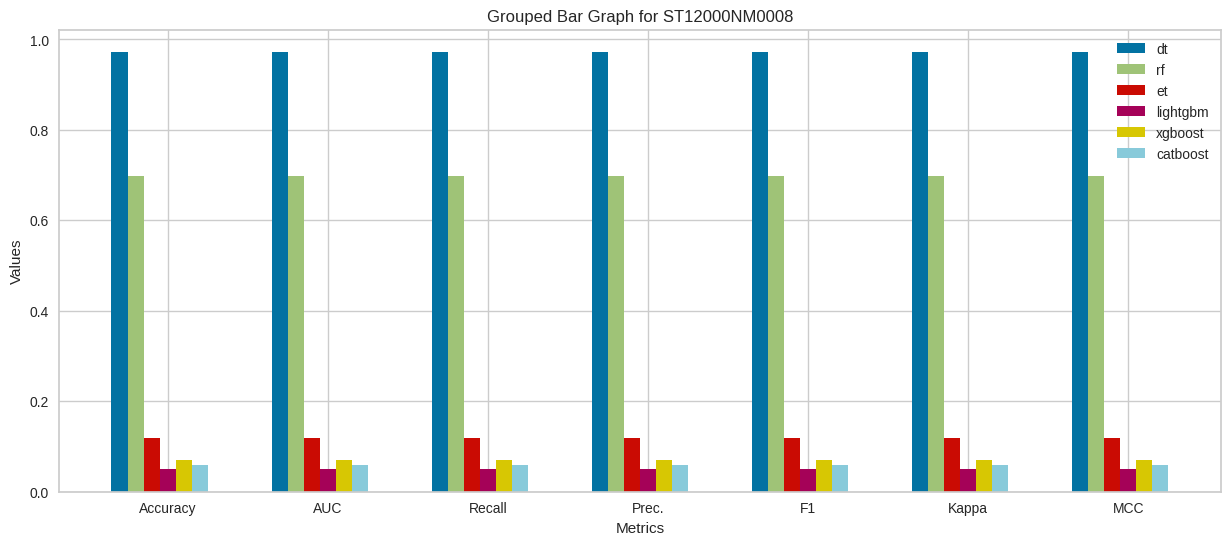

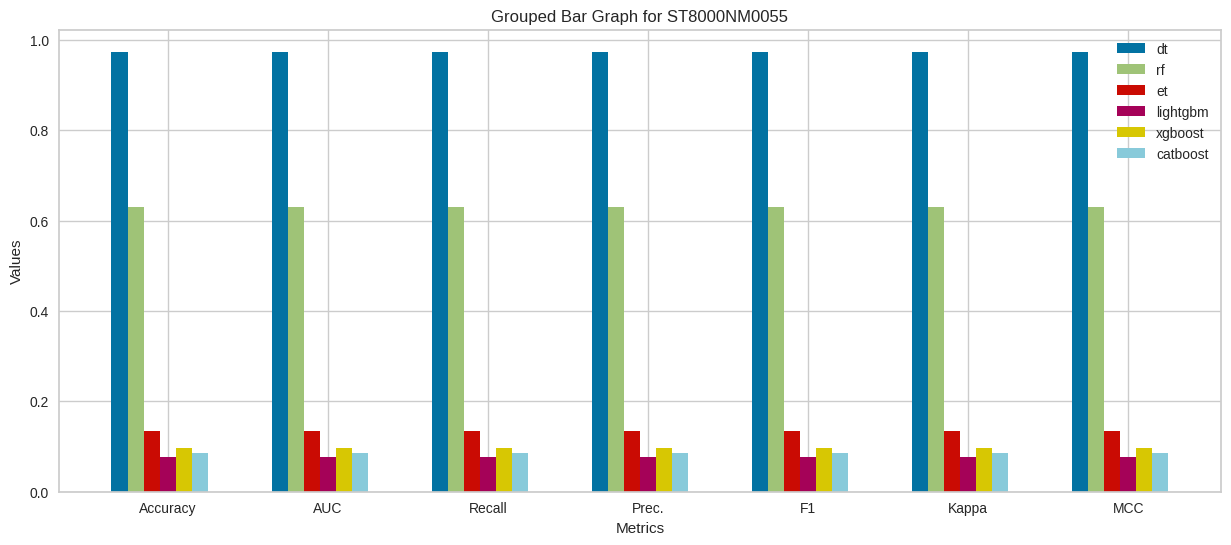

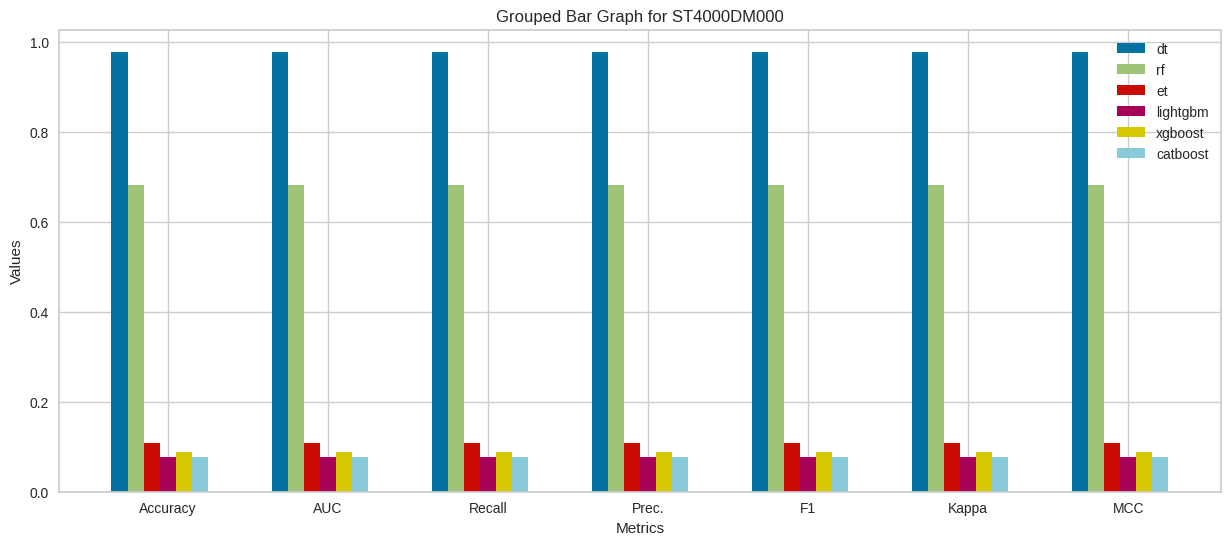

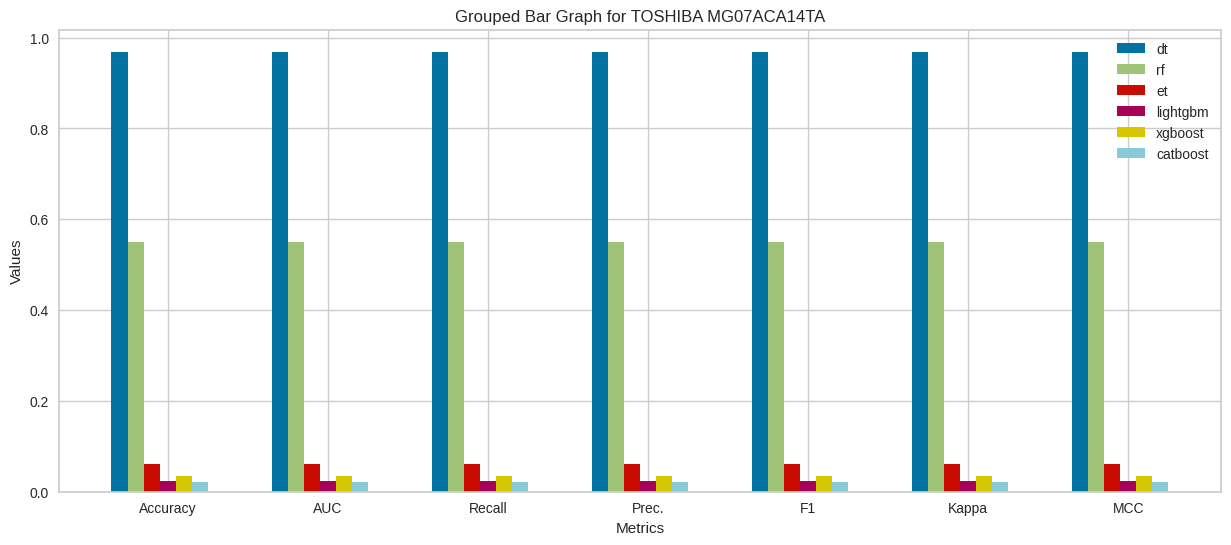

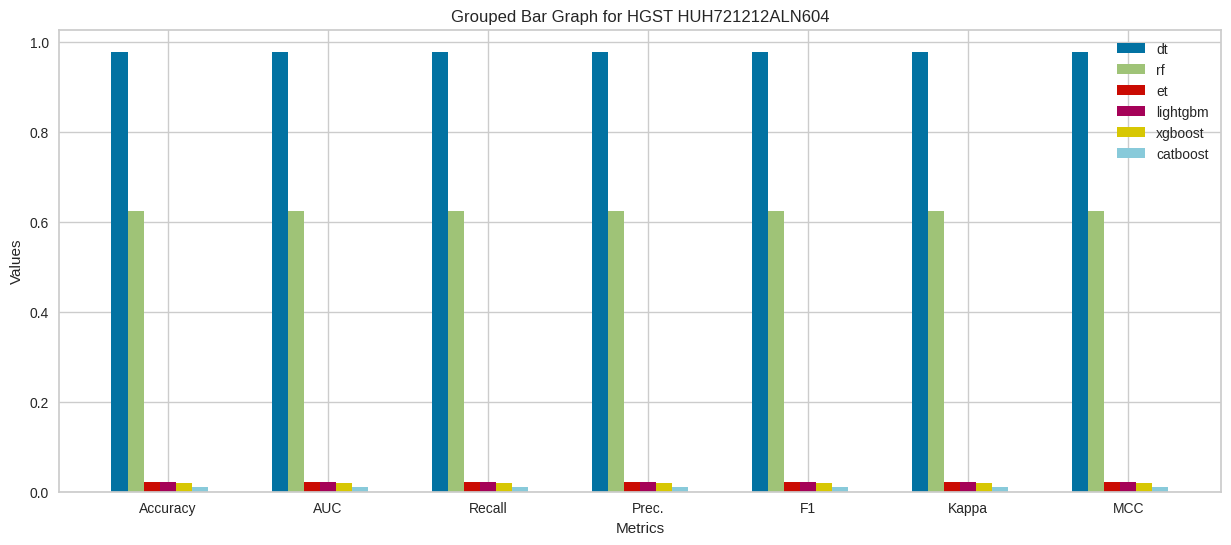

In [8]:
count = 0
metric_names = m_results[0].columns.tolist()


for dev_models in model_df['model']:
    metric = []
    for m in ml_models:
        metric_values = m_results[count].values[0]
        metric.append(metric_values)
        count += 1

    # Set the x-axis positions and bar width
    x_pos = np.arange(len(metric_names))
    bar_width = 0.1

    # Plot the grouped bar graph
    fig, ax = plt.subplots(figsize=(15, 6))
    for i, model_name in enumerate(ml_models):
        ax.bar(x_pos + i * bar_width, metric_values[i], bar_width, label=model_name)

    # Set the x-axis labels and title
    ax.set_xticks(x_pos + (len(ml_models) / 2) * bar_width)
    ax.set_xticklabels(metric_names)
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.set_title('Grouped Bar Graph for {}'.format(dev_models))

    # Add legends
    ax.legend()

    # Show the plot
    plt.show()
